In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix

%matplotlib inline

In [3]:
data = pd.read_csv("survey lung cancer.csv")

In [4]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


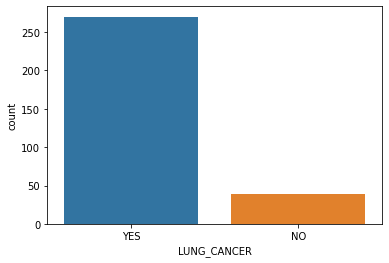

In [5]:
x = data['LUNG_CANCER']
ax = sns.countplot(x=x, data=data)

In [8]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        ax = sns.countplot(x=data[col], hue=hue, data=data)

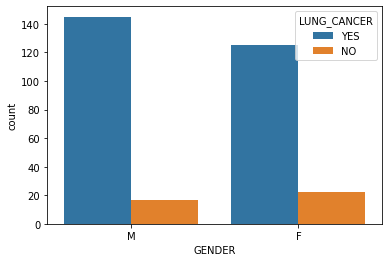

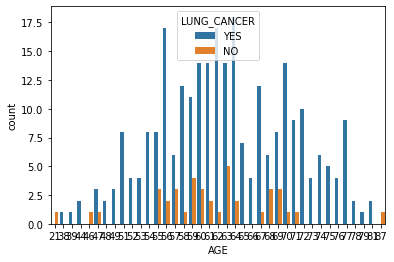

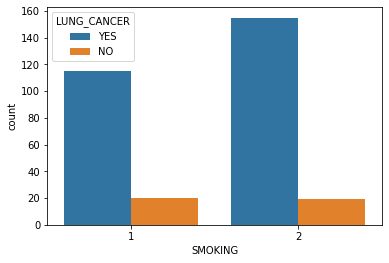

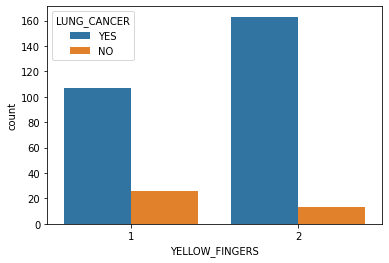

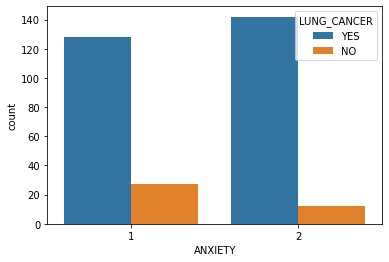

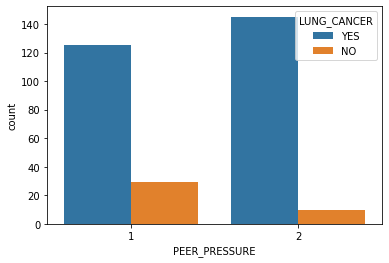

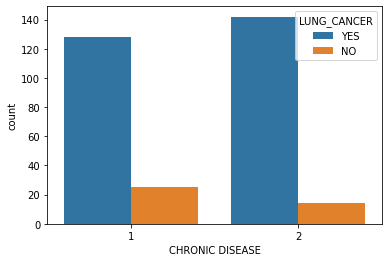

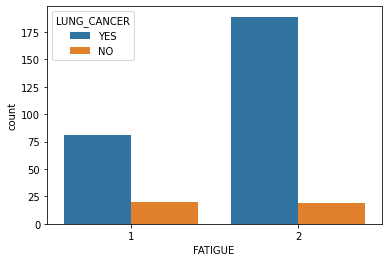

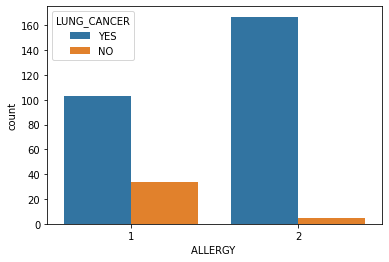

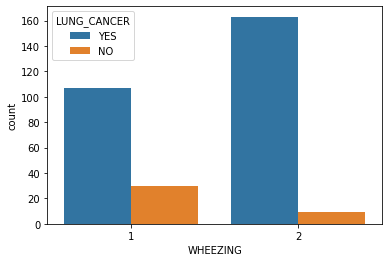

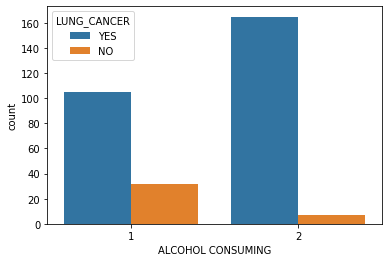

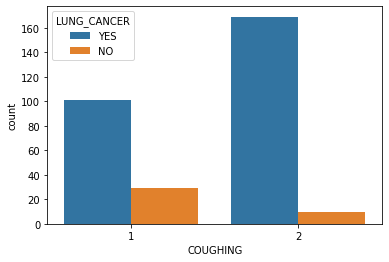

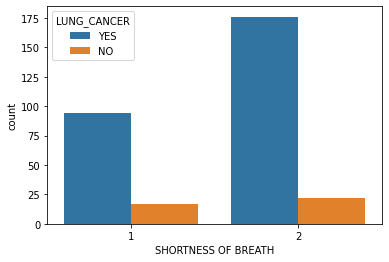

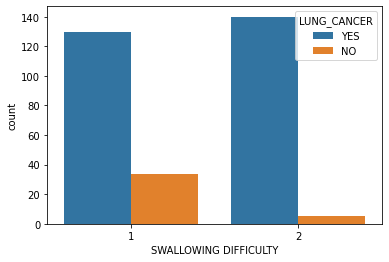

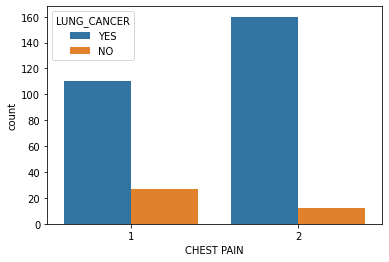

In [9]:
hue = data['LUNG_CANCER']
data_to_plot = data.drop('LUNG_CANCER', axis=1)
plot_data(hue, data_to_plot)

## Preprocessing

In [10]:
for col in data.columns:
    print(f"{col}: {data[col].isnull().sum()}")

GENDER: 0
AGE: 0
SMOKING: 0
YELLOW_FINGERS: 0
ANXIETY: 0
PEER_PRESSURE: 0
CHRONIC DISEASE: 0
FATIGUE : 0
ALLERGY : 0
WHEEZING: 0
ALCOHOL CONSUMING: 0
COUGHING: 0
SHORTNESS OF BREATH: 0
SWALLOWING DIFFICULTY: 0
CHEST PAIN: 0
LUNG_CANCER: 0


In [11]:
le = LabelEncoder()
data["LUNG_CANCER"] = le.fit_transform(data["LUNG_CANCER"])
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [12]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


In [13]:
y = data["LUNG_CANCER"].values.reshape(-1,1)
X = encoded_data.drop(["LUNG_CANCER"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

##  Probar logistiaca

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train.ravel())
y_prob = logistic_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5,1,0)

C:\Users\Gabriel\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
log_confusion_matrix = confusion_matrix(y_test, y_pred)
log_confusion_matrix

array([[ 4,  4],
       [ 1, 53]], dtype=int64)

In [19]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9398148148148149

In [20]:
def plot_roc(roc_auc):
    plt.figure(figsize = (7,7))
    plt.title("ROC")
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = % 0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

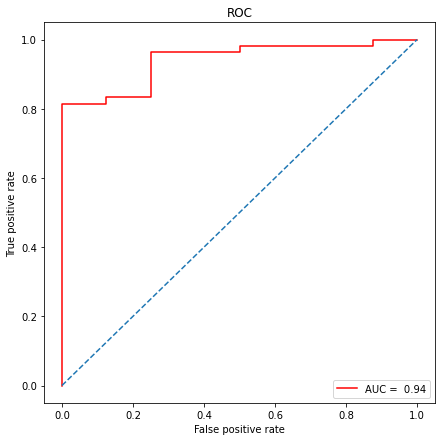

In [21]:
plot_roc(roc_auc)

## LDA

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train.ravel())
y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob_lda > 0.5,1,0)

In [25]:
lda_confusion_matrix = confusion_matrix(y_test,y_pred_lda)
lda_confusion_matrix

array([[ 5,  3],
       [ 1, 53]], dtype=int64)

In [26]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

0.9398148148148149

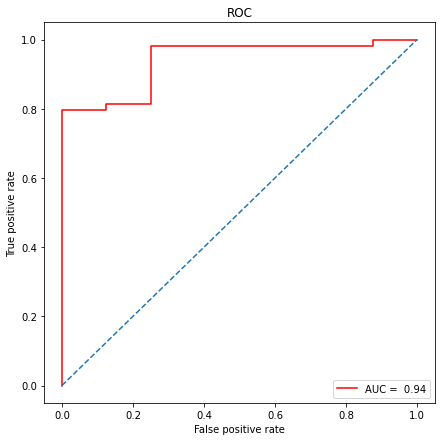

In [28]:
plot_roc(roc_auc_lda)

## QDA

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [106]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train.ravel())
y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob_qda > 0.5,1,0)





C:\Users\Gabriel\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [107]:
qda_confusion_matrix = confusion_matrix(y_test,y_pred_qda)
qda_confusion_matrix

array([[ 4,  4],
       [ 2, 52]], dtype=int64)

In [108]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda

0.8865740740740741

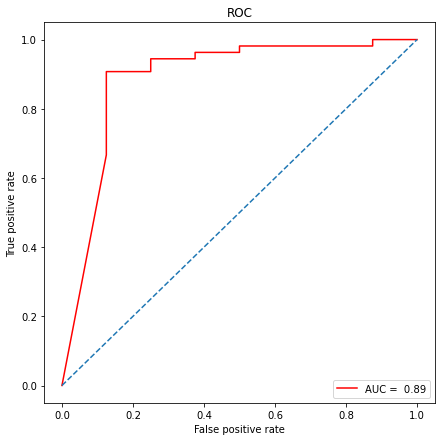

In [34]:

plot_roc(roc_auc_qda)

##  HQDA

In [52]:
# obtener los parámetros: covarianzas
# hay que guardar las covarianzas
Sigma_lda = lda.covariance_
Sigma_qda = qda.covariance_

In [65]:
## "graficando" la covarianza de lda
cm = sns.light_palette("blue", as_cmap=True)
x=pd.DataFrame(Sigma_lda)
x=x.style.background_gradient(cmap=cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,71.047826,-0.445458,-0.179995,-0.022424,0.025671,-0.229954,-0.066964,-0.009037,0.086389,0.172761,0.672646,-0.103478,-0.269734,-0.095974,-0.097381,0.097381
1,-0.445458,0.240634,0.000290,0.051243,-0.010348,-0.051009,-0.002864,-0.017344,-0.039983,-0.020352,-0.039196,0.009969,0.018635,0.023578,-0.004922,0.004922
2,-0.179995,0.000290,0.235253,0.136244,0.070342,0.008170,-0.031286,-0.047778,-0.034333,-0.086196,-0.017464,-0.023508,0.078897,-0.033796,0.053009,-0.053009
3,-0.022424,0.051243,0.136244,0.244182,0.055398,-0.006757,-0.041173,-0.055708,-0.062359,-0.058683,-0.068657,-0.031953,0.116606,-0.028422,0.038546,-0.038546
4,0.025671,-0.010348,0.070342,0.055398,0.242214,0.006101,0.011759,-0.044293,-0.030570,-0.050923,-0.025116,-0.058944,0.081931,-0.033333,0.073222,-0.073222
5,-0.229954,-0.051009,0.008170,-0.006757,0.006101,0.246526,-0.035804,0.005532,-0.030913,-0.009643,-0.057791,-0.010666,0.017648,-0.022277,0.047521,-0.047521
6,-0.066964,-0.002864,-0.031286,-0.041173,0.011759,-0.035804,0.213680,-0.009026,0.030522,-0.055069,0.030072,0.088895,-0.041874,-0.015532,0.029206,-0.029206
7,-0.009037,-0.017344,-0.047778,-0.055708,-0.044293,0.005532,-0.009026,0.221328,0.019750,0.066247,0.036787,-0.003004,-0.048913,0.042470,-0.032973,0.032973
8,0.086389,-0.039983,-0.034333,-0.062359,-0.030570,-0.030913,0.030522,0.019750,0.233067,0.034130,0.084169,0.010535,-0.008455,0.036157,-0.024717,0.024717
9,0.172761,-0.020352,-0.086196,-0.058683,-0.050923,-0.009643,-0.055069,0.066247,0.034130,0.226655,0.035142,-0.045840,-0.031104,0.076945,-0.102368,0.102368


In [69]:
## "graficando" la covarianza 1 de qda
cm = sns.light_palette("blue", as_cmap=True)
x=pd.DataFrame(Sigma_qda[0])
x=x.style.background_gradient(cmap=cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,113.746237,-0.831183,-1.096774,-0.220430,0.579570,-0.449462,0.488172,-1.162366,0.432258,0.527957,0.698925,0.059140,-0.805376,-0.453763,-0.083871,0.083871
1,-0.831183,0.255914,0.017204,0.002151,-0.031183,-0.052688,-0.007527,0.045161,-0.094624,-0.006452,-0.061290,-0.062366,-0.006452,0.002151,-0.013978,0.013978
2,-1.096774,0.017204,0.225806,0.036559,-0.030108,-0.062366,-0.161290,-0.032258,-0.008602,-0.009677,0.024731,-0.060215,0.056989,0.036559,-0.004301,0.004301
3,-0.220430,0.002151,0.036559,0.212903,-0.020430,-0.049462,-0.045161,-0.029032,-0.067742,0.061290,-0.034409,-0.140860,0.061290,-0.020430,-0.083871,0.083871
4,0.579570,-0.031183,-0.030108,-0.020430,0.212903,-0.016129,-0.045161,-0.029032,0.032258,0.027957,0.032258,-0.040860,-0.038710,0.079570,-0.083871,0.083871
5,-0.449462,-0.052688,-0.062366,-0.049462,-0.016129,0.245161,0.039785,0.027957,-0.056989,0.015054,-0.090323,0.034409,-0.018280,-0.082796,0.054839,-0.054839
6,0.488172,-0.007527,-0.161290,-0.045161,-0.045161,0.039785,0.258065,0.018280,-0.012903,-0.064516,-0.046237,0.109677,-0.064516,-0.045161,0.093548,-0.093548
7,-1.162366,0.045161,-0.032258,-0.029032,-0.029032,0.027957,0.018280,0.090323,0.010753,0.020430,0.010753,0.008602,-0.012903,0.004301,0.005376,-0.005376
8,0.432258,-0.094624,-0.008602,-0.067742,0.032258,-0.056989,-0.012903,0.010753,0.180645,0.003226,0.113978,0.064516,0.003226,0.065591,-0.009677,0.009677
9,0.527957,-0.006452,-0.009677,0.061290,0.027957,0.015054,-0.064516,0.020430,0.003226,0.116129,0.003226,-0.077419,0.016129,0.027957,-0.081720,0.081720


In [70]:
## "graficando" la covarianza 2 de qda
cm = sns.light_palette("blue", as_cmap=True)
x=pd.DataFrame(Sigma_qda[1])
x=x.style.background_gradient(cmap=cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,65.750818,-0.395780,-0.053747,0.004996,-0.051378,-0.201464,-0.145047,0.151809,0.038932,0.124806,0.675237,-0.127132,-0.197502,-0.046942,-0.100172,0.100172
1,-0.395780,0.240741,-0.002067,0.058570,-0.007537,-0.051249,-0.002239,-0.026227,-0.032730,-0.022481,-0.036477,0.020155,0.022308,0.026787,-0.003704,0.003704
2,-0.053747,-0.002067,0.238760,0.151421,0.085013,0.018088,-0.013437,-0.050388,-0.038243,-0.097674,-0.023514,-0.018605,0.082687,-0.043928,0.061499,-0.061499
3,0.004996,0.058570,0.151421,0.250818,0.066494,-0.000861,-0.040999,-0.059948,-0.062188,-0.075969,-0.074074,-0.017054,0.125409,-0.029802,0.055986,-0.055986
4,-0.051378,-0.007537,0.085013,0.066494,0.248557,0.009259,0.019811,-0.046835,-0.039621,-0.062403,-0.033355,-0.062016,0.099526,-0.049397,0.095823,-0.095823
5,-0.201464,-0.051249,0.018088,-0.000861,0.009259,0.249009,-0.046684,0.002455,-0.027562,-0.013178,-0.053790,-0.017054,0.022825,-0.014040,0.046942,-0.046942
6,-0.145047,-0.002239,-0.013437,-0.040999,0.019811,-0.046684,0.209475,-0.012920,0.036865,-0.054264,0.040999,0.086822,-0.039104,-0.011542,0.020500,-0.020500
7,0.151809,-0.026227,-0.050388,-0.059948,-0.046835,0.002455,-0.012920,0.241667,0.021189,0.073256,0.040762,-0.004651,-0.054393,0.048191,-0.038630,0.038630
8,0.038932,-0.032730,-0.038243,-0.062188,-0.039621,-0.027562,0.036865,0.021189,0.242550,0.038760,0.080792,0.003101,-0.010164,0.032386,-0.027046,0.027046
9,0.124806,-0.022481,-0.097674,-0.075969,-0.062403,-0.013178,-0.054264,0.073256,0.038760,0.244186,0.039922,-0.041860,-0.037984,0.084496,-0.106202,0.106202


 se ve que tienen estructuras distintas

## Realizando el HQDA 

In [101]:
def new_cov(S_lda, S_qda, l):
    S_hqda = (1-l)*np.array(S_qda) + l*np.array(S_lda)
    return(S_hqda)

In [102]:
# una vez estimados los parámetros del lda y qda, se procede a realizar la mezcla de ambos en proporción (1-lambda) y lambda
hqda_01 = qda
hqda_02 = qda
hqda_05 = qda
hqda_07 = qda
hqda_09 = qda

In [125]:
hqda_01.covariance_ = new_cov(Sigma_lda, Sigma_qda, 0.1)
hqda_02.covariance_ = new_cov(Sigma_lda, Sigma_qda, 0.2)
hqda_05.covariance_ = new_cov(Sigma_lda, Sigma_qda, 0.5)
hqda_07.covariance_ = new_cov(Sigma_lda, Sigma_qda, 0.7)
hqda_09.covariance_ = new_cov(Sigma_lda, Sigma_qda, 0.9)

In [117]:

def resultados(modelo):
    
    y_prob_modelo = modelo.predict_proba(X_test)[:,1]
    y_pred_modelo = np.where(y_prob_modelo > 0.5,1,0)

    modelo_confusion_matrix = confusion_matrix(y_test,y_pred_modelo)
    print("matriz de confusión \n")
    print(modelo_confusion_matrix,'\n')

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_modelo)
    roc_auc_modelo = auc(false_positive_rate, true_positive_rate)

    plot_roc(roc_auc_qda)

matriz de confusión 

[[ 4  4]
 [ 2 52]] 



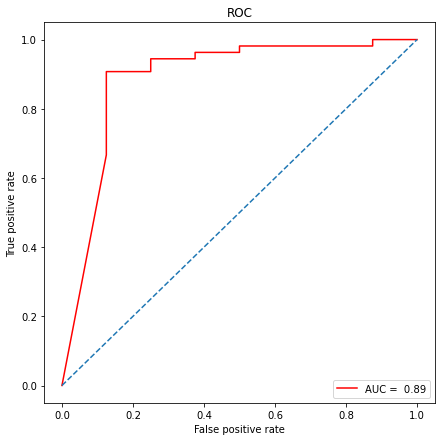

In [124]:
resultados(hqda_01)

matriz de confusión 

[[ 4  4]
 [ 2 52]] 



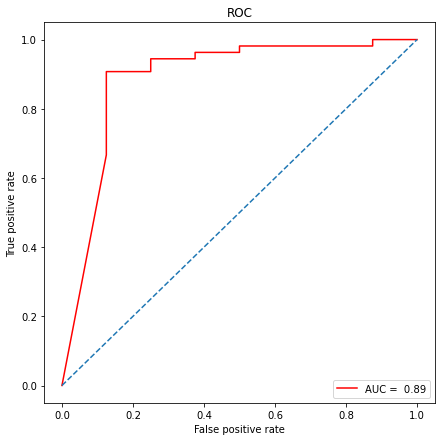

In [119]:
resultados(hqda_02)

matriz de confusión 

[[ 4  4]
 [ 2 52]] 



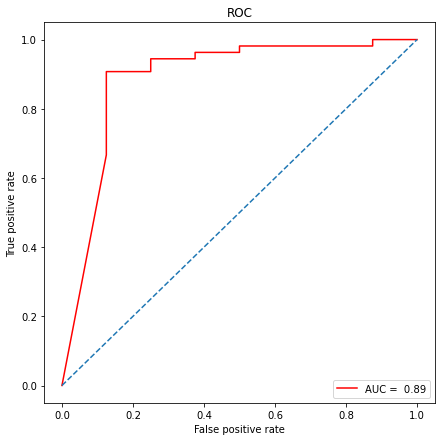

In [120]:
resultados(hqda_05)

matriz de confusión 

[[ 4  4]
 [ 2 52]] 



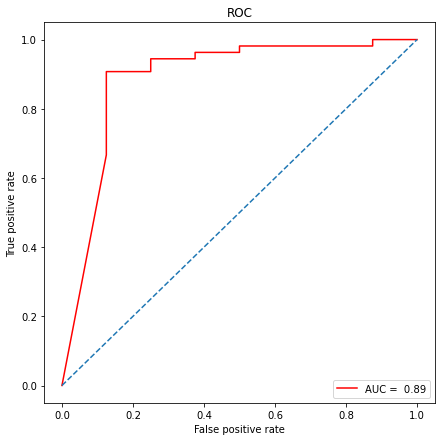

In [121]:
resultados(hqda_07)

matriz de confusión 

[[ 4  4]
 [ 2 52]] 



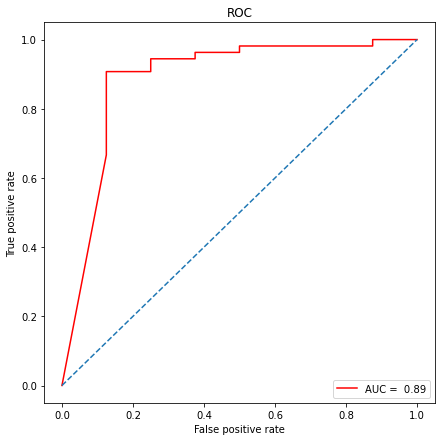

In [122]:
resultados(hqda_09)

In [126]:
qda.predict_proba(X_test)[:,1]

array([1.00000000e+00, 1.00000000e+00, 9.97940006e-01, 1.00000000e+00,
       1.35523175e-04, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       5.12689747e-04, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.98257544e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 4.84937664e-02, 1.00000000e+00,
       5.52362902e-01, 9.99985643e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 4.95775235e-06, 1.00000000e+00,
       1.00000000e+00, 9.99999994e-01, 1.00000000e+00, 1.00000000e+00,
       9.99996090e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99215610e-01, 1.00000000e+00, 1.00000000e+00, 9.99999998e-01,
       9.99998305e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99998849e-01, 1.00000000e+00, 1.16839158e-04, 1.00000000e+00,
      

In [128]:
hqda_09.predict_proba(X_test)[:,1]

array([1.00000000e+00, 1.00000000e+00, 9.97940006e-01, 1.00000000e+00,
       1.35523175e-04, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       5.12689747e-04, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.98257544e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 4.84937664e-02, 1.00000000e+00,
       5.52362902e-01, 9.99985643e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 4.95775235e-06, 1.00000000e+00,
       1.00000000e+00, 9.99999994e-01, 1.00000000e+00, 1.00000000e+00,
       9.99996090e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99215610e-01, 1.00000000e+00, 1.00000000e+00, 9.99999998e-01,
       9.99998305e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99998849e-01, 1.00000000e+00, 1.16839158e-04, 1.00000000e+00,
      

In [129]:
lda.predict_proba(X_test)[:,1]

array([0.99920319, 0.99916728, 0.94246733, 0.87598762, 0.14491438,
       0.99802269, 0.99996013, 0.96552354, 0.09197509, 0.99453708,
       0.99710037, 0.9973136 , 0.99997897, 0.98288818, 0.99737355,
       0.98461909, 0.99788619, 0.99972559, 0.6826542 , 0.9999557 ,
       0.99321746, 0.9943966 , 0.92149132, 0.99991781, 0.01626229,
       0.4953838 , 0.99938692, 0.99974694, 0.87265821, 0.99246244,
       0.6158642 , 0.99990969, 0.99436917, 0.99337386, 0.98884662,
       0.99980137, 0.98316849, 0.90365359, 0.99924806, 0.9886673 ,
       0.84212483, 0.99588144, 0.99996836, 0.99379784, 0.72005152,
       0.99957277, 0.99991466, 0.99708255, 0.6694934 , 0.99981339,
       0.99997748, 0.99749397, 0.99068664, 0.99246244, 0.05194186,
       0.9979589 , 0.97909159, 0.99685104, 0.9335757 , 0.06297108,
       0.99176995, 0.99753031])

In [130]:
hqda_01.covariance_ = new_cov(Sigma_lda, Sigma_qda, 1)
hqda_01.predict_proba(X_test)[:,1]

array([1.00000000e+00, 1.00000000e+00, 9.97940006e-01, 1.00000000e+00,
       1.35523175e-04, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       5.12689747e-04, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.98257544e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 4.84937664e-02, 1.00000000e+00,
       5.52362902e-01, 9.99985643e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 4.95775235e-06, 1.00000000e+00,
       1.00000000e+00, 9.99999994e-01, 1.00000000e+00, 1.00000000e+00,
       9.99996090e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99215610e-01, 1.00000000e+00, 1.00000000e+00, 9.99999998e-01,
       9.99998305e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99998849e-01, 1.00000000e+00, 1.16839158e-04, 1.00000000e+00,
      

In [137]:
qda.set_params()

QuadraticDiscriminantAnalysis(store_covariance=True)